# PM2.5

In [1]:
import pandas as pd
df=pd.read_excel(r"C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\Taylor_comp\PM2.5\taylor_PM25.xlsx")
dft=pd.read_excel(r"C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\Taylor_comp\PM2.5\taylortime_PM25.xlsx")

In [2]:
df.columns

Index(['Unnamed: 0', 'decision_tree', 'testdt', 'gbpred', 'forest_pred'], dtype='object')

In [3]:
df['decision_tree'].std()

82.0596906295026

In [4]:
dft.columns

Index(['Unnamed: 0', 'holts', 'timetest', 'prophetpred'], dtype='object')

In [5]:
df=df[['decision_tree', 'gbpred', 'forest_pred','testdt']]
dft=dft[['holts', 'prophetpred', 'timetest']]

In [6]:
dft

,holts,prophetpred,timetest
0,231.869705,226.357018,207.205806
1,237.821852,104.292329,148.574643
2,265.835119,79.137426,103.335484
3,236.144255,81.861031,102.489333
4,246.292470,106.701778,102.255161
5,252.244618,81.636034,76.771000
6,280.257884,44.784271,45.430323
7,250.567020,43.218479,48.106129
8,260.715235,50.015716,51.802667
9,266.667383,99.327277,145.899032


In [7]:
df.to_pickle("Taylor_PM2.5.pkl")
dft.to_pickle("Taylort_PM2.5.pkl")


In [8]:
import skill_metrics as sm
from fbprophet import Prophet

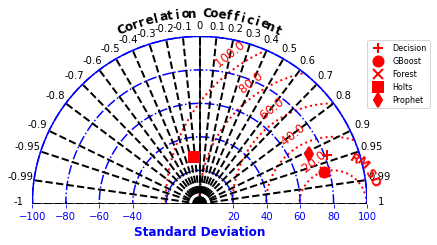

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import skill_metrics as sm
from sys import version_info

def load_obj(name):
    # Load object from file in pickle format
    if version_info[0] == 2:
        suffix = 'pkl'
    else:
        suffix = 'pkl'

    with open(name + '.' + suffix, 'rb') as f:
        return pickle.load(f) # Python2 succeeds

class Container(object): 
    
    def __init__(self, pred1, pred2, ref):
        self.pred1 = pred1
        self.pred2 = pred2
        self.ref = ref
        
if __name__ == '__main__':
    
    # Close any previously open graphics windows
    # ToDo: fails to work within Eclipse
    plt.close('all')
        
    # Read data from pickle file
    data = load_obj('Taylor_PM2.5')
    datat = load_obj('Taylort_PM2.5')
    # Calculate statistics for Taylor diagram
    # The first array element (e.g. taylor_stats1[0]) corresponds to the 
    # reference series while the second and subsequent elements
    # (e.g. taylor_stats1[1:]) are those for the predicted series.
    taylor_stats1 = sm.taylor_statistics(data.decision_tree,data.testdt,'data')
    taylor_stats2 = sm.taylor_statistics(data.gbpred,data.testdt,'data')
    taylor_stats3 = sm.taylor_statistics(data.forest_pred,data.testdt,'data')
    taylor_stats4 = sm.taylor_statistics(datat.holts,datat.timetest,'datat')
    taylor_stats5 = sm.taylor_statistics(datat.prophetpred,datat.timetest,'datat')
    
    
    # Store statistics in arrays
    sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                     taylor_stats2['sdev'][1],taylor_stats3['sdev'][1],taylor_stats4['sdev'][1],taylor_stats5['sdev'][1]])
    crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                      taylor_stats2['crmsd'][1],taylor_stats3['crmsd'][1],taylor_stats4['crmsd'][1],taylor_stats5['crmsd'][1]])
    ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                      taylor_stats2['ccoef'][1],taylor_stats3['ccoef'][1],taylor_stats4['ccoef'][1],taylor_stats5['ccoef'][1]])
    # Specify labels for points in a cell array (M1 for model prediction 1,
    # etc.). Note that a label needs to be specified for the reference even
    # though it is not used.
    
    label = ['Observation', 'Decision', 'GBoost','Forest','Holts','Prophet']
    
    '''
    Produce the Taylor diagram
    Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
    Increase the upper limit for the SDEV axis and rotate the CRMSD contour
    labels (counter-clockwise from x-axis). Exchange color and line style
    choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
    the line width of all lines.
    For an exhaustive list of options to customize your diagram, 
    please call the function at a Python command line:
    >> taylor_diagram
    '''
    sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                      markerLabelColor = 'r',markerColor = 'r',markerLegend = 'on',colRMS = 'r',styleRMS = ':',titleRMS = 'on',widthRMS = 2.0,titleRMSDangle = 40.0,
                     colSTD = 'b', styleSTD = '-.',titleSTD = 'on',colCOR = 'k', styleCOR = '--',titleCOR = 'on',widthCOR = 2.0,markerSize = 10)

    # Write plot to file
    plt.savefig('taylorPM2.5.png')

    # Show plot
    plt.show()

# PM10

In [10]:
import pandas as pd
df=pd.read_excel(r"C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\Taylor_comp\PM10\taylor_PM10.xlsx")
dft=pd.read_excel(r"C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\Taylor_comp\PM10\taylortime_PM10 (1).xlsx")

In [11]:
df.columns

Index(['Unnamed: 0', 'decision_tree', 'testdt', 'gbpred', 'forest_pred'], dtype='object')

In [12]:
df['decision_tree'].std()

113.71187195789308

In [13]:
dft.columns

Index(['Unnamed: 0', 'holts', 'timetest', 'prophetpred'], dtype='object')

In [14]:
df=df[['decision_tree', 'gbpred', 'forest_pred','testdt']]
dft=dft[['holts', 'prophetpred', 'timetest']]

In [15]:
dft

,holts,prophetpred,timetest
0,389.155079,147.003893,358.559355
1,433.637441,110.705538,280.915000
2,430.292371,95.405002,223.457097
3,402.949965,23.307748,254.871000
4,412.650266,40.723895,220.050968
5,457.132628,25.797252,216.719000
6,453.787558,25.288063,102.755806
7,426.445152,38.100402,121.732903
8,436.145453,39.307227,123.900333
9,480.627815,70.821136,321.148065


In [16]:
df.to_pickle("Taylor_PM10.pkl")
dft.to_pickle("Taylort_PM10.pkl")


In [17]:
import skill_metrics as sm
from fbprophet import Prophet

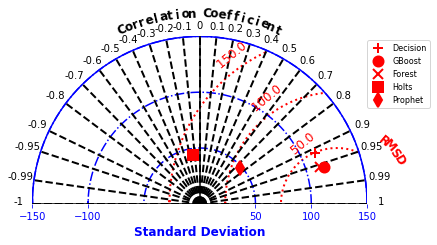

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import skill_metrics as sm
from sys import version_info

def load_obj(name):
    # Load object from file in pickle format
    if version_info[0] == 2:
        suffix = 'pkl'
    else:
        suffix = 'pkl'

    with open(name + '.' + suffix, 'rb') as f:
        return pickle.load(f) # Python2 succeeds

class Container(object): 
    
    def __init__(self, pred1, pred2, ref):
        self.pred1 = pred1
        self.pred2 = pred2
        self.ref = ref
        
if __name__ == '__main__':
    
    # Close any previously open graphics windows
    # ToDo: fails to work within Eclipse
    plt.close('all')
        
    # Read data from pickle file
    data = load_obj('Taylor_PM10')
    datat = load_obj('Taylort_PM10')
    # Calculate statistics for Taylor diagram
    # The first array element (e.g. taylor_stats1[0]) corresponds to the 
    # reference series while the second and subsequent elements
    # (e.g. taylor_stats1[1:]) are those for the predicted series.
    taylor_stats1 = sm.taylor_statistics(data.decision_tree,data.testdt,'data')
    taylor_stats2 = sm.taylor_statistics(data.gbpred,data.testdt,'data')
    taylor_stats3 = sm.taylor_statistics(data.forest_pred,data.testdt,'data')
    taylor_stats4 = sm.taylor_statistics(datat.holts,datat.timetest,'datat')
    taylor_stats5 = sm.taylor_statistics(datat.prophetpred,datat.timetest,'datat')
    
    
    # Store statistics in arrays
    sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                     taylor_stats2['sdev'][1],taylor_stats3['sdev'][1],taylor_stats4['sdev'][1],taylor_stats5['sdev'][1]])
    crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                      taylor_stats2['crmsd'][1],taylor_stats3['crmsd'][1],taylor_stats4['crmsd'][1],taylor_stats5['crmsd'][1]])
    ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                      taylor_stats2['ccoef'][1],taylor_stats3['ccoef'][1],taylor_stats4['ccoef'][1],taylor_stats5['ccoef'][1]])
    # Specify labels for points in a cell array (M1 for model prediction 1,
    # etc.). Note that a label needs to be specified for the reference even
    # though it is not used.
    
    label = ['Observation', 'Decision', 'GBoost','Forest','Holts','Prophet']
    
    '''
    Produce the Taylor diagram
    Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
    Increase the upper limit for the SDEV axis and rotate the CRMSD contour
    labels (counter-clockwise from x-axis). Exchange color and line style
    choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
    the line width of all lines.
    For an exhaustive list of options to customize your diagram, 
    please call the function at a Python command line:
    >> taylor_diagram
    '''
    sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                      markerLabelColor = 'r',markerColor = 'r',markerLegend = 'on',colRMS = 'r',styleRMS = ':',titleRMS = 'on',widthRMS = 2.0,titleRMSDangle = 40.0,
                     colSTD = 'b', styleSTD = '-.',titleSTD = 'on',colCOR = 'k', styleCOR = '--',titleCOR = 'on',widthCOR = 2.0,markerSize = 10)

    # Write plot to file
    plt.savefig('taylorPM10.png')

    # Show plot
    plt.show()

# NO

In [19]:
import pandas as pd
df=pd.read_excel(r"C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\Taylor_comp\NO\taylor_NO.xlsx")
dft=pd.read_excel(r"C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\Taylor_comp\NO\taylortime_NO.xlsx")

In [20]:
df.columns

Index(['Unnamed: 0', 'decision_tree', 'testdt', 'gbpred', 'forest_pred'], dtype='object')

In [21]:
df['decision_tree'].std()

56.227985667950975

In [22]:
dft.columns

Index(['Unnamed: 0', 'holts', 'timetest', 'prophetpred'], dtype='object')

In [23]:
df=df[['decision_tree', 'gbpred', 'forest_pred','testdt']]
dft=dft[['holts', 'prophetpred', 'timetest']]

In [24]:
dft

,holts,prophetpred,timetest
0,185.327512,147.003893,68.465806
1,149.764126,110.705538,78.978214
2,144.433121,95.405002,57.421290
3,92.051942,23.307748,47.512333
4,73.220319,40.723895,59.052903
5,62.582920,25.797252,15.687000
6,61.754064,25.288063,14.959032
7,67.372949,38.100402,14.675161
8,69.843214,39.307227,32.982000
9,123.230705,70.821136,129.338065


In [25]:
df.to_pickle("Taylor_NO.pkl")
dft.to_pickle("Taylort_NO.pkl")


In [26]:
import skill_metrics as sm
from fbprophet import Prophet

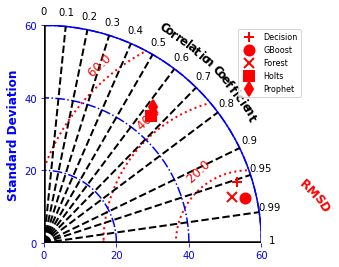

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import skill_metrics as sm
from sys import version_info

def load_obj(name):
    # Load object from file in pickle format
    if version_info[0] == 2:
        suffix = 'pkl'
    else:
        suffix = 'pkl'

    with open(name + '.' + suffix, 'rb') as f:
        return pickle.load(f) # Python2 succeeds

class Container(object): 
    
    def __init__(self, pred1, pred2, ref):
        self.pred1 = pred1
        self.pred2 = pred2
        self.ref = ref
        
if __name__ == '__main__':
    
    # Close any previously open graphics windows
    # ToDo: fails to work within Eclipse
    plt.close('all')
        
    # Read data from pickle file
    data = load_obj('Taylor_NO')
    datat = load_obj('Taylort_NO')
    # Calculate statistics for Taylor diagram
    # The first array element (e.g. taylor_stats1[0]) corresponds to the 
    # reference series while the second and subsequent elements
    # (e.g. taylor_stats1[1:]) are those for the predicted series.
    taylor_stats1 = sm.taylor_statistics(data.decision_tree,data.testdt,'data')
    taylor_stats2 = sm.taylor_statistics(data.gbpred,data.testdt,'data')
    taylor_stats3 = sm.taylor_statistics(data.forest_pred,data.testdt,'data')
    taylor_stats4 = sm.taylor_statistics(datat.holts,datat.timetest,'datat')
    taylor_stats5 = sm.taylor_statistics(datat.prophetpred,datat.timetest,'datat')
    
    
    # Store statistics in arrays
    sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                     taylor_stats2['sdev'][1],taylor_stats3['sdev'][1],taylor_stats4['sdev'][1],taylor_stats5['sdev'][1]])
    crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                      taylor_stats2['crmsd'][1],taylor_stats3['crmsd'][1],taylor_stats4['crmsd'][1],taylor_stats5['crmsd'][1]])
    ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                      taylor_stats2['ccoef'][1],taylor_stats3['ccoef'][1],taylor_stats4['ccoef'][1],taylor_stats5['ccoef'][1]])
    # Specify labels for points in a cell array (M1 for model prediction 1,
    # etc.). Note that a label needs to be specified for the reference even
    # though it is not used.
    
    label = ['Observation', 'Decision', 'GBoost','Forest','Holts','Prophet']
    
    '''
    Produce the Taylor diagram
    Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
    Increase the upper limit for the SDEV axis and rotate the CRMSD contour
    labels (counter-clockwise from x-axis). Exchange color and line style
    choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
    the line width of all lines.
    For an exhaustive list of options to customize your diagram, 
    please call the function at a Python command line:
    >> taylor_diagram
    '''
    sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                      markerLabelColor = 'r',markerColor = 'r',markerLegend = 'on',colRMS = 'r',styleRMS = ':',titleRMS = 'on',widthRMS = 2.0,titleRMSDangle = 40.0,
                     colSTD = 'b', styleSTD = '-.',titleSTD = 'on',colCOR = 'k', styleCOR = '--',titleCOR = 'on',widthCOR = 2.0,markerSize = 10)

    # Write plot to file
    plt.savefig('taylorNO.png')

    # Show plot
    from matplotlib.pyplot import figure
    plt.show()

# NO2

In [28]:
import pandas as pd
df=pd.read_excel(r"C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\Taylor_comp\NO2\taylor_NO2.xlsx")
dft=pd.read_excel(r"C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\Taylor_comp\NO2\taylortime_NO2.xlsx")

In [29]:
df.columns

Index(['Unnamed: 0', 'decision_tree', 'testdt', 'gbpred', 'forest_pred'], dtype='object')

In [30]:
df['decision_tree'].std()

23.658886124237135

In [31]:
dft.columns

Index(['Unnamed: 0', 'holts', 'timetest', 'prophetpred'], dtype='object')

In [32]:
df=df[['decision_tree', 'gbpred', 'forest_pred','testdt']]
dft=dft[['holts', 'prophetpred', 'timetest']]

In [33]:
dft

,holts,prophetpred,timetest
0,81.209733,75.107511,76.134194
1,83.360259,67.963174,76.348214
2,67.978877,56.164159,75.439355
3,74.158550,66.035263,83.948000
4,76.358555,69.406201,79.742258
5,63.177862,56.832134,60.003333
6,46.454038,36.958911,41.429839
7,42.007975,33.266717,22.096129
8,41.503608,29.058316,26.636000
9,76.480085,72.393939,82.012581


In [34]:
df.to_pickle("Taylor_NO2.pkl")
dft.to_pickle("Taylort_NO2.pkl")


In [35]:
import skill_metrics as sm
from fbprophet import Prophet

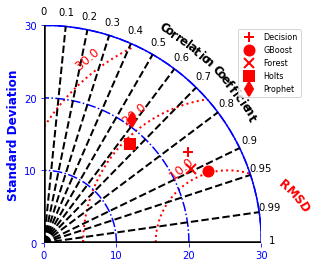

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import skill_metrics as sm
from sys import version_info

def load_obj(name):
    # Load object from file in pickle format
    if version_info[0] == 2:
        suffix = 'pkl'
    else:
        suffix = 'pkl'

    with open(name + '.' + suffix, 'rb') as f:
        return pickle.load(f) # Python2 succeeds

class Container(object): 
    
    def __init__(self, pred1, pred2, ref):
        self.pred1 = pred1
        self.pred2 = pred2
        self.ref = ref
        
if __name__ == '__main__':
    
    # Close any previously open graphics windows
    # ToDo: fails to work within Eclipse
    plt.close('all')
        
    # Read data from pickle file
    data = load_obj('Taylor_NO2')
    datat = load_obj('Taylort_NO2')
    # Calculate statistics for Taylor diagram
    # The first array element (e.g. taylor_stats1[0]) corresponds to the 
    # reference series while the second and subsequent elements
    # (e.g. taylor_stats1[1:]) are those for the predicted series.
    taylor_stats1 = sm.taylor_statistics(data.decision_tree,data.testdt,'data')
    taylor_stats2 = sm.taylor_statistics(data.gbpred,data.testdt,'data')
    taylor_stats3 = sm.taylor_statistics(data.forest_pred,data.testdt,'data')
    taylor_stats4 = sm.taylor_statistics(datat.holts,datat.timetest,'datat')
    taylor_stats5 = sm.taylor_statistics(datat.prophetpred,datat.timetest,'datat')
    
    
    # Store statistics in arrays
    sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                     taylor_stats2['sdev'][1],taylor_stats3['sdev'][1],taylor_stats4['sdev'][1],taylor_stats5['sdev'][1]])
    crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                      taylor_stats2['crmsd'][1],taylor_stats3['crmsd'][1],taylor_stats4['crmsd'][1],taylor_stats5['crmsd'][1]])
    ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                      taylor_stats2['ccoef'][1],taylor_stats3['ccoef'][1],taylor_stats4['ccoef'][1],taylor_stats5['ccoef'][1]])
    # Specify labels for points in a cell array (M1 for model prediction 1,
    # etc.). Note that a label needs to be specified for the reference even
    # though it is not used.
    
    label = ['Observation', 'Decision', 'GBoost','Forest','Holts','Prophet']
    
    '''
    Produce the Taylor diagram
    Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
    Increase the upper limit for the SDEV axis and rotate the CRMSD contour
    labels (counter-clockwise from x-axis). Exchange color and line style
    choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
    the line width of all lines.
    For an exhaustive list of options to customize your diagram, 
    please call the function at a Python command line:
    >> taylor_diagram
    '''
    sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                      markerLabelColor = 'r',markerColor = 'r',markerLegend = 'on',colRMS = 'r',styleRMS = ':',titleRMS = 'on',widthRMS = 2.0,titleRMSDangle = 40.0,
                     colSTD = 'b', styleSTD = '-.',titleSTD = 'on',colCOR = 'k', styleCOR = '--',titleCOR = 'on',widthCOR = 2.0,markerSize = 10)

    # Write plot to file
    plt.savefig('taylorPM10.png')

    # Show plot
    plt.show()

# NOx

In [37]:
import pandas as pd
df=pd.read_excel(r"C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\Taylor_comp\NOx\taylor_NOx.xlsx")
dft=pd.read_excel(r"C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\Taylor_comp\NOx\taylortime_NOx.xlsx")

In [38]:
df.columns

Index(['Unnamed: 0', 'decision_tree', 'testdt', 'gbpred', 'forest_pred'], dtype='object')

In [39]:
df['decision_tree'].std()

89.88929132893759

In [40]:
dft.columns

Index(['Unnamed: 0', 'holts', 'timetest', 'prophetpred'], dtype='object')

In [41]:
df=df[['decision_tree', 'gbpred', 'forest_pred','testdt']]
dft=dft[['holts', 'prophetpred', 'timetest']]

In [42]:
dft

,holts,prophetpred,timetest
0,342.041335,237.153643,167.502258
1,286.083680,167.238450,119.950000
2,266.498443,136.489536,119.842903
3,173.075415,32.528755,94.122333
4,139.761902,54.719067,114.114839
5,117.464987,36.338022,59.023000
6,173.490176,86.614698,34.447097
7,199.099916,112.312594,23.734194
8,72.071748,16.978653,42.938333
9,198.982099,85.701974,155.128387


In [43]:
df.to_pickle("Taylor_NOx.pkl")
dft.to_pickle("Taylort_NOx.pkl")


In [44]:
import skill_metrics as sm
from fbprophet import Prophet

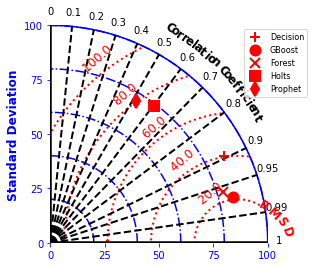

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import skill_metrics as sm
from sys import version_info

def load_obj(name):
    # Load object from file in pickle format
    if version_info[0] == 2:
        suffix = 'pkl'
    else:
        suffix = 'pkl'

    with open(name + '.' + suffix, 'rb') as f:
        return pickle.load(f) # Python2 succeeds

class Container(object): 
    
    def __init__(self, pred1, pred2, ref):
        self.pred1 = pred1
        self.pred2 = pred2
        self.ref = ref
        
if __name__ == '__main__':
    
    # Close any previously open graphics windows
    # ToDo: fails to work within Eclipse
    plt.close('all')
        
    # Read data from pickle file
    data = load_obj('Taylor_NOx')
    datat = load_obj('Taylort_NOx')
    # Calculate statistics for Taylor diagram
    # The first array element (e.g. taylor_stats1[0]) corresponds to the 
    # reference series while the second and subsequent elements
    # (e.g. taylor_stats1[1:]) are those for the predicted series.
    taylor_stats1 = sm.taylor_statistics(data.decision_tree,data.testdt,'data')
    taylor_stats2 = sm.taylor_statistics(data.gbpred,data.testdt,'data')
    taylor_stats3 = sm.taylor_statistics(data.forest_pred,data.testdt,'data')
    taylor_stats4 = sm.taylor_statistics(datat.holts,datat.timetest,'datat')
    taylor_stats5 = sm.taylor_statistics(datat.prophetpred,datat.timetest,'datat')
    
    
    # Store statistics in arrays
    sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                     taylor_stats2['sdev'][1],taylor_stats3['sdev'][1],taylor_stats4['sdev'][1],taylor_stats5['sdev'][1]])
    crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                      taylor_stats2['crmsd'][1],taylor_stats3['crmsd'][1],taylor_stats4['crmsd'][1],taylor_stats5['crmsd'][1]])
    ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                      taylor_stats2['ccoef'][1],taylor_stats3['ccoef'][1],taylor_stats4['ccoef'][1],taylor_stats5['ccoef'][1]])
    # Specify labels for points in a cell array (M1 for model prediction 1,
    # etc.). Note that a label needs to be specified for the reference even
    # though it is not used.
    
    label = ['Observation', 'Decision', 'GBoost','Forest','Holts','Prophet']
    
    '''
    Produce the Taylor diagram
    Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
    Increase the upper limit for the SDEV axis and rotate the CRMSD contour
    labels (counter-clockwise from x-axis). Exchange color and line style
    choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
    the line width of all lines.
    For an exhaustive list of options to customize your diagram, 
    please call the function at a Python command line:
    >> taylor_diagram
    '''
    sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                      markerLabelColor = 'r',markerColor = 'r',markerLegend = 'on',colRMS = 'r',styleRMS = ':',titleRMS = 'on',widthRMS = 2.0,titleRMSDangle = 40.0,
                     colSTD = 'b', styleSTD = '-.',titleSTD = 'on',colCOR = 'k', styleCOR = '--',titleCOR = 'on',widthCOR = 2.0,markerSize = 10)

    # Write plot to file
    plt.savefig('taylorPM10.png')

    # Show plot
    plt.show()

# NH3

In [47]:
import pandas as pd
df=pd.read_excel(r"C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\Taylor_comp\NH3\taylor_NH3.xlsx")
dft=pd.read_excel(r"C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\Taylor_comp\NH3\taylortime_NH3.xlsx")

In [48]:
df.columns

Index(['Unnamed: 0', 'decision_tree', 'testdt', 'gbpred', 'forest_pred'], dtype='object')

In [49]:
df['decision_tree'].std()

12.312964189564392

In [50]:
dft.columns

Index(['Unnamed: 0', 'holts', 'timetest', 'prophetpred'], dtype='object')

In [51]:
df=df[['decision_tree', 'gbpred', 'forest_pred','testdt']]
dft=dft[['holts', 'prophetpred', 'timetest']]

In [52]:
dft

,holts,prophetpred,timetest
0,58.895620,61.317368,37.217097
1,35.939939,31.339674,33.922857
2,29.201773,24.284167,32.269355
3,27.537910,27.500663,35.495000
4,32.872665,29.971939,37.711290
5,32.069378,31.501222,40.974333
6,27.464499,24.145304,30.787742
7,21.889262,19.620196,17.701613
8,19.363286,17.055958,15.631000
9,29.170282,26.135856,39.484516


In [63]:
df.to_pickle("Taylor_NH3.pkl")
dft.to_pickle("Taylort_NH3.pkl")


In [54]:
import skill_metrics as sm
from fbprophet import Prophet

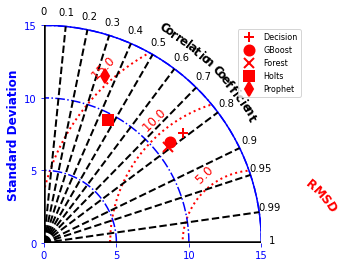

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import skill_metrics as sm
from sys import version_info

def load_obj(name):
    # Load object from file in pickle format
    if version_info[0] == 2:
        suffix = 'pkl'
    else:
        suffix = 'pkl'

    with open(name + '.' + suffix, 'rb') as f:
        return pickle.load(f) # Python2 succeeds

class Container(object): 
    
    def __init__(self, pred1, pred2, ref):
        self.pred1 = pred1
        self.pred2 = pred2
        self.ref = ref
        
if __name__ == '__main__':
    
    # Close any previously open graphics windows
    # ToDo: fails to work within Eclipse
    plt.close('all')
        
    # Read data from pickle file
    data = load_obj('Taylor_NH3')
    datat = load_obj('Taylort_NH3')
    # Calculate statistics for Taylor diagram
    # The first array element (e.g. taylor_stats1[0]) corresponds to the 
    # reference series while the second and subsequent elements
    # (e.g. taylor_stats1[1:]) are those for the predicted series.
    taylor_stats1 = sm.taylor_statistics(data.decision_tree,data.testdt,'data')
    taylor_stats2 = sm.taylor_statistics(data.gbpred,data.testdt,'data')
    taylor_stats3 = sm.taylor_statistics(data.forest_pred,data.testdt,'data')
    taylor_stats4 = sm.taylor_statistics(datat.holts,datat.timetest,'datat')
    taylor_stats5 = sm.taylor_statistics(datat.prophetpred,datat.timetest,'datat')
    
    
    # Store statistics in arrays
    sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                     taylor_stats2['sdev'][1],taylor_stats3['sdev'][1],taylor_stats4['sdev'][1],taylor_stats5['sdev'][1]])
    crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                      taylor_stats2['crmsd'][1],taylor_stats3['crmsd'][1],taylor_stats4['crmsd'][1],taylor_stats5['crmsd'][1]])
    ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                      taylor_stats2['ccoef'][1],taylor_stats3['ccoef'][1],taylor_stats4['ccoef'][1],taylor_stats5['ccoef'][1]])
    # Specify labels for points in a cell array (M1 for model prediction 1,
    # etc.). Note that a label needs to be specified for the reference even
    # though it is not used.
    
    label = ['Observation', 'Decision', 'GBoost','Forest','Holts','Prophet']
    
    '''
    Produce the Taylor diagram
    Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
    Increase the upper limit for the SDEV axis and rotate the CRMSD contour
    labels (counter-clockwise from x-axis). Exchange color and line style
    choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
    the line width of all lines.
    For an exhaustive list of options to customize your diagram, 
    please call the function at a Python command line:
    >> taylor_diagram
    '''
    sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                      markerLabelColor = 'r',markerColor = 'r',markerLegend = 'on',colRMS = 'r',styleRMS = ':',titleRMS = 'on',widthRMS = 2.0,titleRMSDangle = 40.0,
                     colSTD = 'b', styleSTD = '-.',titleSTD = 'on',colCOR = 'k', styleCOR = '--',titleCOR = 'on',widthCOR = 2.0,markerSize = 10)

    # Write plot to file
    plt.savefig('taylorPM10.png')

    # Show plot
    plt.show()

# Ozone

In [56]:
import pandas as pd
df=pd.read_excel(r"C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\Taylor_comp\Ozone\taylor_Ozone.xlsx")
dft=pd.read_excel(r"C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\Taylor_comp\Ozone\taylortime_Ozone.xlsx")

In [57]:
df.columns

Index(['Unnamed: 0', 'decision_tree', 'testdt', 'gbpred', 'forest_pred'], dtype='object')

In [58]:
df['decision_tree'].std()

19.222019346118504

In [59]:
dft.columns

Index(['Unnamed: 0', 'holts', 'timetest', 'prophetpred'], dtype='object')

In [60]:
df=df[['decision_tree', 'gbpred', 'forest_pred','testdt']]
dft=dft[['holts', 'prophetpred', 'timetest']]

In [61]:
dft

,holts,prophetpred,timetest
0,22.364747,28.063974,28.810792
1,31.088682,28.765259,35.948766
2,50.442876,54.294606,52.314194
3,49.886085,45.109209,52.861333
4,57.639811,62.904259,60.491935
5,28.550058,40.994837,39.936667
6,9.241282,12.657590,23.020323
7,11.826420,12.937185,23.598065
8,21.029502,22.801520,27.082000
9,40.655691,39.124788,40.730323


In [66]:
df.to_pickle("Taylor_Ozone.pkl")
dft.to_pickle("Taylort_Ozone.pkl")


In [64]:
import skill_metrics as sm
from fbprophet import Prophet

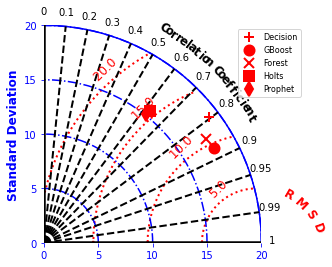

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import skill_metrics as sm
from sys import version_info

def load_obj(name):
    # Load object from file in pickle format
    if version_info[0] == 2:
        suffix = 'pkl'
    else:
        suffix = 'pkl'

    with open(name + '.' + suffix, 'rb') as f:
        return pickle.load(f) # Python2 succeeds

class Container(object): 
    
    def __init__(self, pred1, pred2, ref):
        self.pred1 = pred1
        self.pred2 = pred2
        self.ref = ref
        
if __name__ == '__main__':
    
    # Close any previously open graphics windows
    # ToDo: fails to work within Eclipse
    plt.close('all')
        
    # Read data from pickle file
    data = load_obj('Taylor_Ozone')
    datat = load_obj('Taylort_Ozone')
    # Calculate statistics for Taylor diagram
    # The first array element (e.g. taylor_stats1[0]) corresponds to the 
    # reference series while the second and subsequent elements
    # (e.g. taylor_stats1[1:]) are those for the predicted series.
    taylor_stats1 = sm.taylor_statistics(data.decision_tree,data.testdt,'data')
    taylor_stats2 = sm.taylor_statistics(data.gbpred,data.testdt,'data')
    taylor_stats3 = sm.taylor_statistics(data.forest_pred,data.testdt,'data')
    taylor_stats4 = sm.taylor_statistics(datat.holts,datat.timetest,'datat')
    taylor_stats5 = sm.taylor_statistics(datat.prophetpred,datat.timetest,'datat')
    
    
    # Store statistics in arrays
    sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                     taylor_stats2['sdev'][1],taylor_stats3['sdev'][1],taylor_stats4['sdev'][1],taylor_stats5['sdev'][1]])
    crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                      taylor_stats2['crmsd'][1],taylor_stats3['crmsd'][1],taylor_stats4['crmsd'][1],taylor_stats5['crmsd'][1]])
    ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                      taylor_stats2['ccoef'][1],taylor_stats3['ccoef'][1],taylor_stats4['ccoef'][1],taylor_stats5['ccoef'][1]])
    # Specify labels for points in a cell array (M1 for model prediction 1,
    # etc.). Note that a label needs to be specified for the reference even
    # though it is not used.
    
    label = ['Observation', 'Decision', 'GBoost','Forest','Holts','Prophet']
    
    '''
    Produce the Taylor diagram
    Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
    Increase the upper limit for the SDEV axis and rotate the CRMSD contour
    labels (counter-clockwise from x-axis). Exchange color and line style
    choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
    the line width of all lines.
    For an exhaustive list of options to customize your diagram, 
    please call the function at a Python command line:
    >> taylor_diagram
    '''
    sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                      markerLabelColor = 'r',markerColor = 'r',markerLegend = 'on',colRMS = 'r',styleRMS = ':',titleRMS = 'on',widthRMS = 2.0,titleRMSDangle = 40.0,
                     colSTD = 'b', styleSTD = '-.',titleSTD = 'on',colCOR = 'k', styleCOR = '--',titleCOR = 'on',widthCOR = 2.0,markerSize = 10)

    # Write plot to file
    plt.savefig('taylorPM10.png')

    # Show plot
    plt.show()

In [ ]:
import pandas as pd
df=pd.read_excel(r"C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\Taylor_comp\NH3\taylor_NH3.xlsx")
dft=pd.read_excel(r"C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\Taylor_comp\NH3\taylortime_NH3.xlsx")

df.columns

df['decision_tree'].std()

dft.columns

df=df[['decision_tree', 'gbpred', 'forest_pred','testdt']]
dft=dft[['holts', 'prophetpred', 'timetest']]

dft

df.to_pickle("Taylor_NH3.pkl")
dft.to_pickle("Taylort_NH3.pkl")


import skill_metrics as sm
from fbprophet import Prophet

import matplotlib.pyplot as plt
import numpy as np
import pickle
import skill_metrics as sm
from sys import version_info

def load_obj(name):
    # Load object from file in pickle format
    if version_info[0] == 2:
        suffix = 'pkl'
    else:
        suffix = 'pkl'

    with open(name + '.' + suffix, 'rb') as f:
        return pickle.load(f) # Python2 succeeds

class Container(object): 
    
    def __init__(self, pred1, pred2, ref):
        self.pred1 = pred1
        self.pred2 = pred2
        self.ref = ref
        
if __name__ == '__main__':
    
    # Close any previously open graphics windows
    # ToDo: fails to work within Eclipse
    plt.close('all')
        
    # Read data from pickle file
    data = load_obj('Taylor_NH3')
    datat = load_obj('Taylort_NH3')
    # Calculate statistics for Taylor diagram
    # The first array element (e.g. taylor_stats1[0]) corresponds to the 
    # reference series while the second and subsequent elements
    # (e.g. taylor_stats1[1:]) are those for the predicted series.
    taylor_stats1 = sm.taylor_statistics(data.decision_tree,data.testdt,'data')
    taylor_stats2 = sm.taylor_statistics(data.gbpred,data.testdt,'data')
    taylor_stats3 = sm.taylor_statistics(data.forest_pred,data.testdt,'data')
    taylor_stats4 = sm.taylor_statistics(datat.holts,datat.timetest,'datat')
    taylor_stats5 = sm.taylor_statistics(datat.prophetpred,datat.timetest,'datat')
    
    
    # Store statistics in arrays
    sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                     taylor_stats2['sdev'][1],taylor_stats3['sdev'][1],taylor_stats4['sdev'][1],taylor_stats5['sdev'][1]])
    crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                      taylor_stats2['crmsd'][1],taylor_stats3['crmsd'][1],taylor_stats4['crmsd'][1],taylor_stats5['crmsd'][1]])
    ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                      taylor_stats2['ccoef'][1],taylor_stats3['ccoef'][1],taylor_stats4['ccoef'][1],taylor_stats5['ccoef'][1]])
    # Specify labels for points in a cell array (M1 for model prediction 1,
    # etc.). Note that a label needs to be specified for the reference even
    # though it is not used.
    
    label = ['Observation', 'Decision', 'GBoost','Forest','Holts','Prophet']
    
    '''
    Produce the Taylor diagram
    Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
    Increase the upper limit for the SDEV axis and rotate the CRMSD contour
    labels (counter-clockwise from x-axis). Exchange color and line style
    choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
    the line width of all lines.
    For an exhaustive list of options to customize your diagram, 
    please call the function at a Python command line:
    >> taylor_diagram
    '''
    sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                      markerLabelColor = 'r',markerColor = 'r',markerLegend = 'on',colRMS = 'r',styleRMS = ':',titleRMS = 'on',widthRMS = 2.0,titleRMSDangle = 40.0,
                     colSTD = 'b', styleSTD = '-.',titleSTD = 'on',colCOR = 'k', styleCOR = '--',titleCOR = 'on',widthCOR = 2.0,markerSize = 10)

    # Write plot to file
    plt.savefig('taylorPM10.png')

    # Show plot
    plt.show()